In [1]:
!pip install pandas_datareader==0.7.0
from IPython.core.debugger import set_trace
import yfinance as yf
import os, pickle
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

### Import plotting things:
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm, laplace, johnsonsu
from scipy import stats
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import numpy as np
import scipy.sparse as sp
import networkx as nx
import matplotlib.pyplot as plt
import scipy.optimize
import collections
import math
import time
import itertools
from scipy.linalg import expm, sinm, cosm, logm
#import warnings
#warning.filterwarnings('ignore')
from qiskit import *


In [3]:
df = pd.read_csv('2018tradesTicks.csv',names=['UTCDate_UTCTime', 'Price', 'Quantity', 'isBuy', 'isSell'])
df

,UTCDate_UTCTime,Price,Quantity,isBuy,isSell
0,2017-12-11 00:00:12.196,2656.25,2,0,1
1,2017-12-11 00:00:12.196,2656.25,3,0,1
2,2017-12-11 00:00:12.196,2656.25,1,0,1
3,2017-12-11 00:00:12.196,2656.25,2,0,1
4,2017-12-11 00:00:12.197,2656.25,4,0,1
...,...,...,...,...,...
4166481,2018-02-02 21:59:59.396,2757.25,1,0,1
4166482,2018-02-02 21:59:59.541,2757.25,3,0,1
4166483,2018-02-02 21:59:59.543,2757.25,1,0,1
4166484,2018-02-02 21:59:59.787,2757.25,1,0,1


       Price  Count
0    2656.25     14
1    2656.00     28
2    2655.75     51
3    2655.50    159
4    2655.25    300
..       ...    ...
903  2877.50    613
904  2877.75    640
905  2878.00    553
906  2878.25    147
907  2878.50    129

[908 rows x 2 columns]


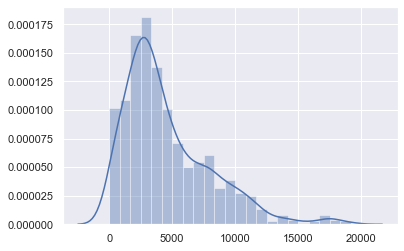

In [4]:
df_precios_unique=df['Price'].unique()


precios_unique = df.pivot_table(index=['Price'], aggfunc='size')

df_precios = pd.DataFrame()
df_precios['Price']=df_precios_unique
df_precios['Count']=precios_unique.tolist()

sns.distplot(precios_unique);
print(df_precios)    


In [5]:
import statistics
partition=64

df_split = np.array_split(df_precios, partition)

precios_suma=df_precios['Count'].sum()
print(precios_suma)

indice=0
arr_vector=[]
arr_median=[]
for dataframe in df_split:
    arr_temp_values=[]
    arr_temp_price=[]
    arr_median_temp=[]
    sumator=0
    for index, row in df_split[indice].iterrows():
        value=row['Count']/precios_suma
        price=row['Price']
        arr_temp_values.append(value)
        arr_temp_price.append(price)
        arr_median_temp.append(row['Price'])
        sumator=sumator+value
    median=statistics.median(arr_median_temp)
    arr_median.append(median)
    arr_vector.append(sumator)   
    minimum=[]   
    maximum=[]
    suma=[]
    peak=[]
    minimum.append(df_split[indice]['Count'].min())
    maximum.append(df_split[indice]['Count'].max())
    suma.append(df_split[indice]['Count'].sum())
    peak.append(str((maximum[0]-minimum[0])/suma[0]))
    
    
    df_temp_peak=pd.DataFrame()
    df_temp_peak['MIN']=minimum
    df_temp_peak['MAX']=maximum
    df_temp_peak['SUM']=suma
    df_temp_peak['PEAK']=peak
    
    df_temp_peak.to_csv('df_temp_peak'+str(indice)+'.csv', sep=';')
        
    df_temp=pd.DataFrame()
    df_temp['Prices']=arr_temp_price
    df_temp['Percent']=arr_temp_values
    df_temp.to_csv('df_temp_'+str(indice)+'.csv', sep=';')
    indice=indice+1
    
print(arr_median)
print(arr_vector)


4166486
[2656.0, 2654.0, 2661.5, 2665.25, 2669.0, 2672.75, 2676.0, 2679.75, 2683.5, 2687.25, 2691.0, 2694.75, 2698.375, 2701.875, 2705.375, 2708.875, 2712.375, 2715.875, 2719.375, 2722.875, 2726.375, 2729.875, 2733.375, 2736.875, 2740.375, 2743.875, 2747.375, 2750.875, 2754.375, 2757.875, 2761.375, 2764.875, 2768.375, 2771.875, 2775.375, 2778.875, 2782.375, 2785.875, 2789.375, 2792.875, 2796.375, 2799.875, 2803.375, 2806.875, 2810.375, 2813.875, 2817.375, 2820.875, 2824.375, 2827.875, 2831.375, 2834.875, 2838.375, 2841.875, 2845.375, 2848.875, 2852.375, 2855.875, 2859.375, 2862.875, 2866.375, 2869.875, 2873.375, 2876.875]
[0.00383488628066913, 0.014155573785679349, 0.012820875913179593, 0.015861327747171118, 0.025167731272827988, 0.026006807655179928, 0.010266205142654986, 0.009763863361115338, 0.0378083593704623, 0.058318928708748816, 0.029226547263089323, 0.025078927422293028, 0.008122192178252849, 0.0018394397581079117, 0.004212902671459835, 0.006096264334021522, 0.00731863733611489

In [6]:
N=6
sx = sp.csr_matrix([[0.0,1.0],[1.0,0.0]])
sz = sp.csr_matrix([[1.0,0.0],[0.0,-1.0]])
sy = -1j * (sz @ sx)

def generate_operators(op, N):
    return [sp.kron(sp.eye(2**i),
                    sp.kron(op, sp.eye(2**(N-i-1))))
            for i in range(N)]

sx = generate_operators(sx, N)
sy = generate_operators(sy, N)
sz = generate_operators(sz, N)
p= np.random.normal(0,3,int(N*(N-1)/2+2*N))

        
                
def cost(args):
        
    Psi=np.ones(2**N)*1/(2**(N/2))     
    Index=np.zeros(N)
    Index[0:2]=3
    a=list(itertools.permutations(Index))
    a=list(dict.fromkeys(a))
    H=0
    for i in range(int(N*(N-1)/2)):
            
        s=1
        for j in a[i]:
                
            if j==0:
                s1=sp.csr_matrix([[1.0,0.0],[0.0,1.0]])
            if j==3:
                s1=sp.csr_matrix([[1.0,0.0],[0.0,-1.0]])                    
            s=sp.kron(s,s1)
                
        H=H+args[i]*s
        
    for j in range(N):
            
        H=H+sz[j]*args[j+int(N*(N-1)/2)]+sx[j]*args[j+int(N*(N-1)/2+N)]
        
    Yexp=np.conj(expm(H)@Psi)*(expm(H)@Psi)
    Yteo=arr_vector
    cost=0
    for i in range(2**N):
            
        cost=Yteo[i]*np.log(Yexp[i])
             
    return cost
             
opt = scipy.optimize.minimize(cost, p)
opt['x']

array([-1.44985951, -2.60568269, -0.57372223,  1.23389177, -1.69340332,
       -4.12738614, -1.88418647,  1.63470956,  0.13569606,  1.66614635,
       -0.70659129,  0.33988385, -0.59428535,  0.94408967,  0.57090519,
       -1.86137286, -1.92146351, -3.46739856,  3.49952164, -1.97247877,
       -2.79216341, -3.62162406,  0.932966  ,  0.191925  , -1.11656328,
       -1.8961709 , -2.39698481])

In [7]:
t = 10.
time_steps = 20

In [8]:
circ = QuantumCircuit(N,N)

# Puertas lógicas que simulan la interacción del Hamiltoniano de Ising 

Index      = np.zeros(N)
Index[0:2] = 1.
a = list(itertools.permutations(Index))
a = list(dict.fromkeys(a))

optimized_p = {}

#Creamos un estado máximamente entrelazado

for i in range(N):
    
    circ.h(i)
        
circ.barrier()

for l in range(time_steps) :

    #Simulamos la evolución del estado con puertas CNOT rotaciones en z y puertas x y z.
    
    for i in range(len(a)):
      
        optimized_p[a[i]] = opt['x'][i]
        s = []
        k=-1
        
        for j in a[i] :
            
            k = k + 1
            
            if j==1 :
                
                s.append(k) 
         
        circ.cx(s[0],s[1])
        circ.rz((t/time_steps)*optimized_p[a[i]],s[1])
        circ.cx(s[0],s[1])

    
    # Puertas lógicas que simulan el término onsite y  del Hamiltoniano de Ising 

    for i in range(N) :
    
        circ.rz((t/time_steps)*opt['x'][int(N*(N-1)/2)+i],i)
        circ.rx((t/time_steps)*opt['x'][int(N*(N-1)/2+N)+i],i)
        
    circ.barrier()
    
for i in range(N):
        
    circ.measure(i,i)
    

In [9]:
opt

      fun: 0.03568380560361208
 hess_inv: array([[  23.55298806,  -37.71096026,   11.70408965,  -43.22719273,
         -42.81838952,   30.40629153,   -3.54262255,   25.19074521,
          25.82046724,    6.70311954,  -43.61315362,  -44.5561348 ,
          10.86851029,   11.12926712,  -47.66910594,   41.70804454,
         -27.2665891 ,   46.74527423,  -10.36706412,   47.47061822,
          50.03036005,   30.77717218,  -48.66533135,  -16.04140621,
         -84.06092336,   15.61121547,   14.33140102],
       [ -37.71096026,   64.05386172,  -19.56608907,   72.27211817,
          71.58255426,  -50.83690834,    5.9243628 ,  -42.11974425,
         -43.17819036,  -11.20940582,   72.92227575,   74.50440236,
         -18.1710068 ,  -18.60081484,   79.69458084,  -69.73200248,
          45.59101785,  -78.15958291,   17.33190252,  -79.36851482,
         -83.64314977,  -51.45840413,   81.36766398,   26.80986585,
         140.5496812 ,  -26.10134496,  -23.96261607],
       [  11.70408965,  -19.566089

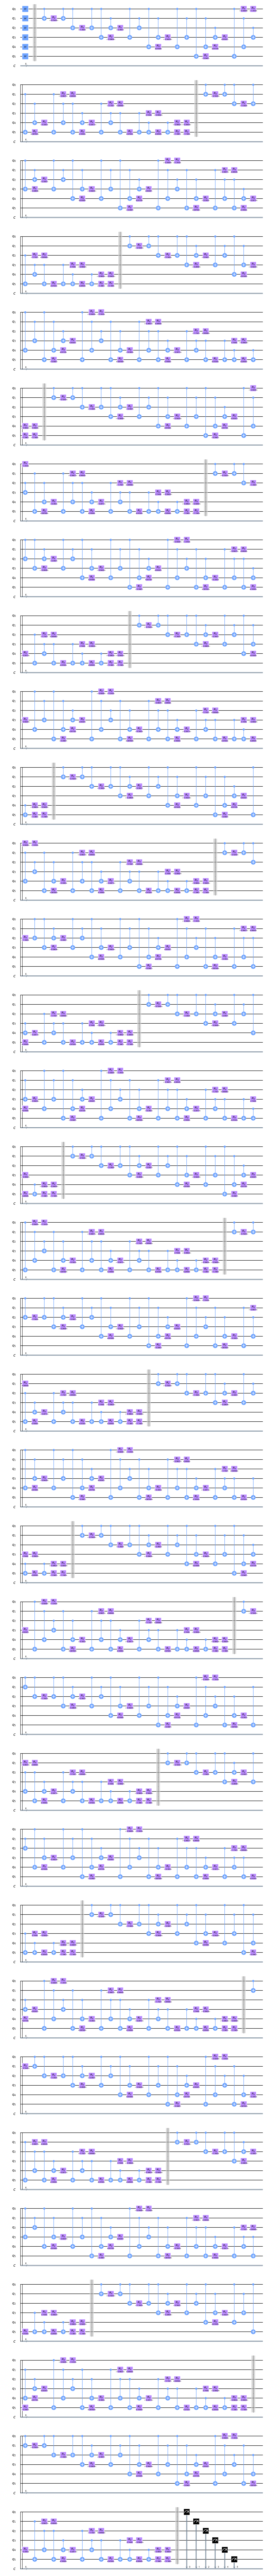

In [10]:
circ.draw(output='mpl')

In [ ]:
backend_sim = Aer.get_backend('qasm_simulator')
NN=1 # One shot experiment

#
temporal_series = []

for i in range(1000):

    job = execute(circ, backend = Aer.get_backend('qasm_simulator'), shots=NN)
    result = job.result()
    counts = result.get_counts(circ)
    
    temporal_series.append(list(counts.keys())[0])
    

counts={}

#Escribe el diccionario con las medidas de los estados

for i in temporal_series:

    if i in counts.keys() : 
        
        counts[i] = counts[i] + 1.
        
    else :
        
        counts[i] = 1.
        
# Número de veces que se mide cada estados
print(counts)
    
for i in counts:
    
    counts[i] = counts[i]/1000


prices_series=[]

# Identifica las etiquetas de los estados con los precios
l=-1

for i in temporal_series:
    l=l+1
    suma = 0
    k=0
    
    for j in i:
        
        k = k + 1    
        suma = suma + int(j)*2**(len(i)-k)
        
    prices_series.append(suma)


#Plot the syntetic temporal price series
sns.lineplot(x=range(1,len(prices_series)+1), y=prices_series,
             data=prices_series)
    
#for j in counts.keys():
#   resultados_porcentuales[j]=round((resultados[j]/S)**(0.5),2) 
#   c_porcentuales[j]=round((counts[j]/NN),2)
#   print(c_porcentuales)

temporal_series


In [ ]:
print(counts)

In [ ]:
l=-1

for i in temporal_series:
    l=l+1
    suma = 0
    k=0
    
    for j in i:
        
        k = k + 1    
        suma = suma + int(j)*2**(len(i)-k)
        
    prices_series.append(arr_median[suma])


#Plot the syntetic temporal price series
pd_price_series=pd.DataFrame()
pd_price_series['prices_series']=prices_series
pd_price_series

sns.lineplot(x=range(1,len(prices_series)+1), y=prices_series,
             data=pd_price_series)

In [ ]:
len(temporal_series)


sns.lineplot(x=range(0,1000), y=df[:1000]['Price'],
             data=df[:1000])

df_precios

In [ ]:
import seaborn as sns
sns.set(style="darkgrid")

arr_temporal_series_keys=[]
arr_temporal_series_count=[]
for value in counts.keys():
    arr_temporal_series_keys.append(value)

for count in arr_temporal_series_keys:
    arr_temporal_series_count.append(counts[count])
# Load an example dataset with long-form data
counts_dataframe=pd.DataFrame()
counts_dataframe['Keys']=arr_temporal_series_keys
counts_dataframe['Count']=arr_temporal_series_count

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=counts_dataframe['Keys'], y=counts_dataframe['Count'],
             data=counts_dataframe)

In [ ]:

mean_vector_pd=pd.DataFrame()
mean_vector_pd['Median']=arr_median
mean_vector_pd['Proba']=arr_vector

# Plot the responses for different events and regions
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x=mean_vector_pd['Median'], y=mean_vector_pd['Proba'],
             data=mean_vector_pd)

In [ ]:
opt

In [ ]:
import pandas as pd
pd_hess_inv=pd.DataFrame()
pd_hess_inv['counts.keys']=counts.keys()
pd_hess_inv['count.values']=counts.values()
pd_hess_inv

pd_hess_inv.to_csv('df_pd_hess_inv.csv', sep=';')

pd_temporal_series=pd.DataFrame()
pd_temporal_series['Temporal_series']=temporal_series

pd_temporal_series.to_csv('df_pd_temporal_series.csv', sep=';')

In [ ]:
type(temporal_series)